In [50]:
import matplotlib.pyplot as plt
import numpy as np

## Vypocet x1-x3, y1-y3 RK4

Soustava ODR pro RK4

In [51]:
def dy_1(x, y):
    return x * y[0] + y[1]

def dy_2(x_0, y):
    return y[0] * y[1] -2

Pocatecni podminky

In [52]:
y_1 = 0.0
y_2 = 1.0
x_0 = 0.0
x_max = 3.0
h = 0.01

In [53]:
y_0 = [y_1, y_2]
funkce = [dy_1, dy_2]
x, y = [x_0], [y_0]

for _ in range(4):
    k_1 = [h * funk(x[-1], y[-1])                                   for funk in funkce]
    k_2 = [h * funk(x[-1] + h/2, np.array(y[-1]) + (h/2) * ki)      for funk, ki in zip(funkce,k_1)]
    k_3 = [h * funk(x[-1] + h/2, y[-1] + (h/2) * ki)                for funk, ki in zip(funkce, k_2)]
    k_4 = [h * funk(x[-1] + h, y[-1] + h * ki)                      for funk, ki in zip(funkce,k_3)]
    y_m = [y[-1][i] + (1/6)*(k_1[i] + 2*k_2[i] + 2*k_3[i] + k_4[i]) for i in range(2)]
    y.append(y_m)
    x.append(x[-1]+h)

P-K

In [54]:
def PKdy_1(x, y):
    hodnoty = [x[i] * y[i][0] + y[i][1] for i in range(4)]
    return hodnoty

def PKdy_2(x_0, y):
    hodnoty = [y[i][0] * y[i][1] - 2 for i in range(4)]
    return hodnoty 
    

In [55]:
funkcePK = [PKdy_1, PKdy_2]

In [56]:
def A_B(x,y, h, funkcePK):
    f_hodnoty = [funk(x[-4:], y[-4:]) for funk in funkcePK]
    prediktor = [y[-1][i] + (h/24) * (55* f_hodnoty[i][0] - 59* f_hodnoty[i][1] + 37* f_hodnoty[i][2] - 9* f_hodnoty[i][3]) for i in range(2)]
    y.append(prediktor)
    x.append(x[-1] + h)
    return x, y

In [57]:
def A_M(x,y,h, funkcePK):
    f_hodnoty = [funk(x[-4:], y[-4:]) for funk in funkcePK]
    korektor = [y[-2][i] + (h/24) * (9* f_hodnoty[i][0] + 19* f_hodnoty[i][1] - 5* f_hodnoty[i][2] + f_hodnoty[i][3]) for i in range(2)]
    y[-1] = korektor

    return x,y

Vysledky

In [58]:
while x[-1]< x_max:
    x,y = A_B(x,y,h, funkcePK)
    x,y = A_M(x,y,h, funkcePK)

Zobrazeni

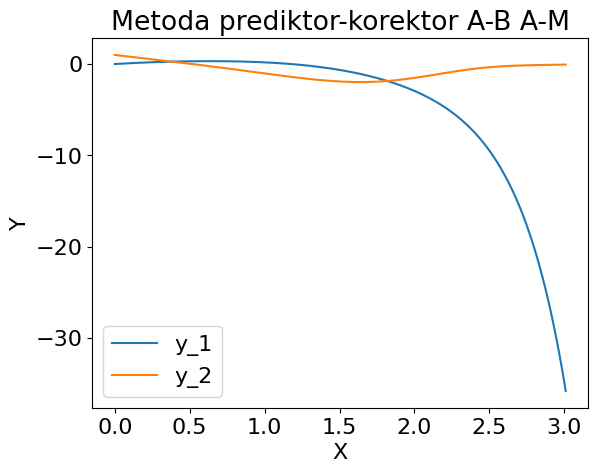

In [61]:
y_1, y_2 = zip(*y)

plt.rcParams.update({'font.size': 16})
plt.title("Metoda prediktor-korektor A-B A-M")
plt.plot(x,y_1, label = "y_1")
plt.plot(x,y_2, label = "y_2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()